In [2]:
import numpy as np
import pandas as pd
import os
import cv2
import matplotlib as mpl
import matplotlib.pyplot as plt
#
import scienceplots
from cmcrameri import cm

In [3]:
plt.style.use(['science', 'ieee'])

In [4]:
df = pd.read_csv("data.csv", index_col="index")
# Ensure we are testing diffraction pattern data
df = df.loc[df.seed.str.match('^pattern.*')]
df

,code,group,seed,phase,epoch,MSE
index,,,,,,
0,100179,I -4 3 m,pattern_random0,test,100,0.009270
1,100202,P a -3,pattern_random0,test,100,0.003467
2,100547,F d -3 m Z,pattern_random0,test,100,0.000058
3,100569,I 2 3,pattern_random0,test,100,0.033810
4,100614,I a -3 d,pattern_random0,test,100,0.001777
...,...,...,...,...,...,...
622695,99181,F d -3 m Z,pattern_random9,val,80,0.000019
622696,99346,F m -3 c,pattern_random9,val,80,0.004168
622697,99458,F d -3 m Z,pattern_random9,val,80,0.000433


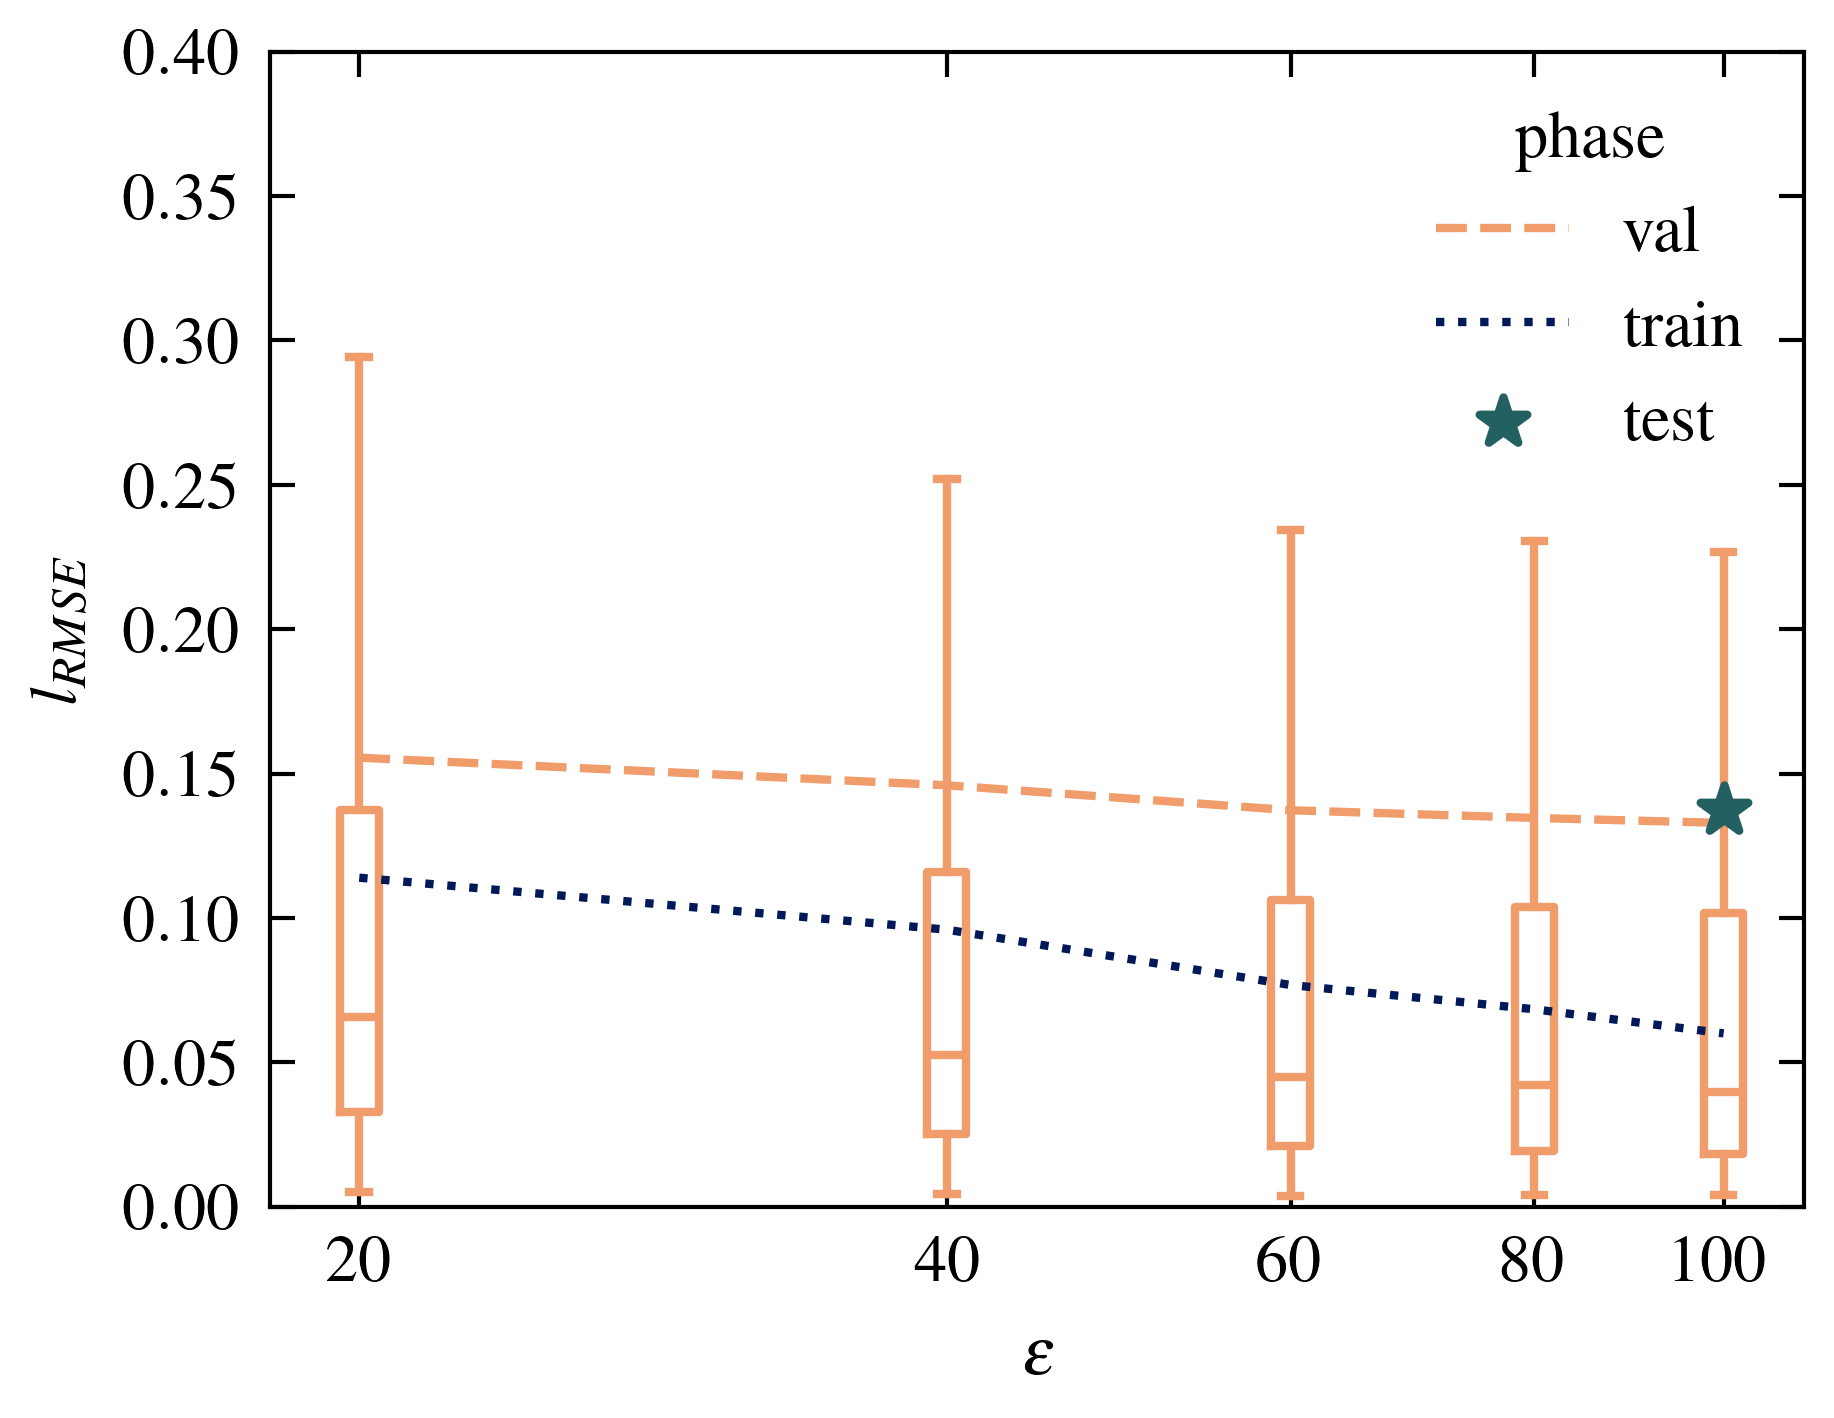

In [5]:
epochs = [20, 40, 60, 80, 100]
pparam = dict(xlabel=r'$\varepsilon$', ylabel=r'$l_{RMSE}$', xticks=epochs, xticklabels=epochs)


fig, ax = plt.subplots()

ax.set_xscale('log')
plt.minorticks_off()

colors = iter([cm.batlowS(i) for i in range(10)])

c_train = next(colors)
next(colors)
next(colors)
c_test = next(colors)
c_val = next(colors)
c_box = dict(color=c_val)


average_mse = df.groupby(['phase', 'epoch'])['MSE'].mean().reset_index()
for i, phase in enumerate(["val", "train"]):
    df_average_mse_phase = average_mse.loc[average_mse['phase'] == phase]
    
    if phase == "train":
        c = c_train
    else:
        c = c_val
    
    # Line plot
    ax.plot(df_average_mse_phase["epoch"], np.sqrt(df_average_mse_phase["MSE"]), label=phase, linestyle=["--", ":"][i], color=c)
    
    # Box plot
    if phase == "val":
        for epoch in epochs:
            width = 10**(np.log10(epoch)+0.01)-10**(np.log10(epoch)-0.01)
            bp = ax.boxplot(np.sqrt(df.loc[(df['phase'] == phase) & (df['epoch'] == epoch)]["MSE"]), positions=[epoch], showfliers=False, widths=width,
                boxprops=c_box, medianprops=c_box, whiskerprops=c_box, capprops=c_box)

# Scatter point
df_test = average_mse.loc[average_mse['phase'] == "test"]
ax.scatter(100, np.sqrt(df_test.loc[df_test["epoch"] == 100]["MSE"]), label="test", marker="*", zorder=2, color=c_test)

ax.legend(title='phase')
ax.autoscale(tight=True)
ax.set_xlim([18, 110])
ax.set_ylim([0, 0.4])
ax.set(**pparam)

fig.savefig('figures/RMSE_against_epoch', dpi=1200)

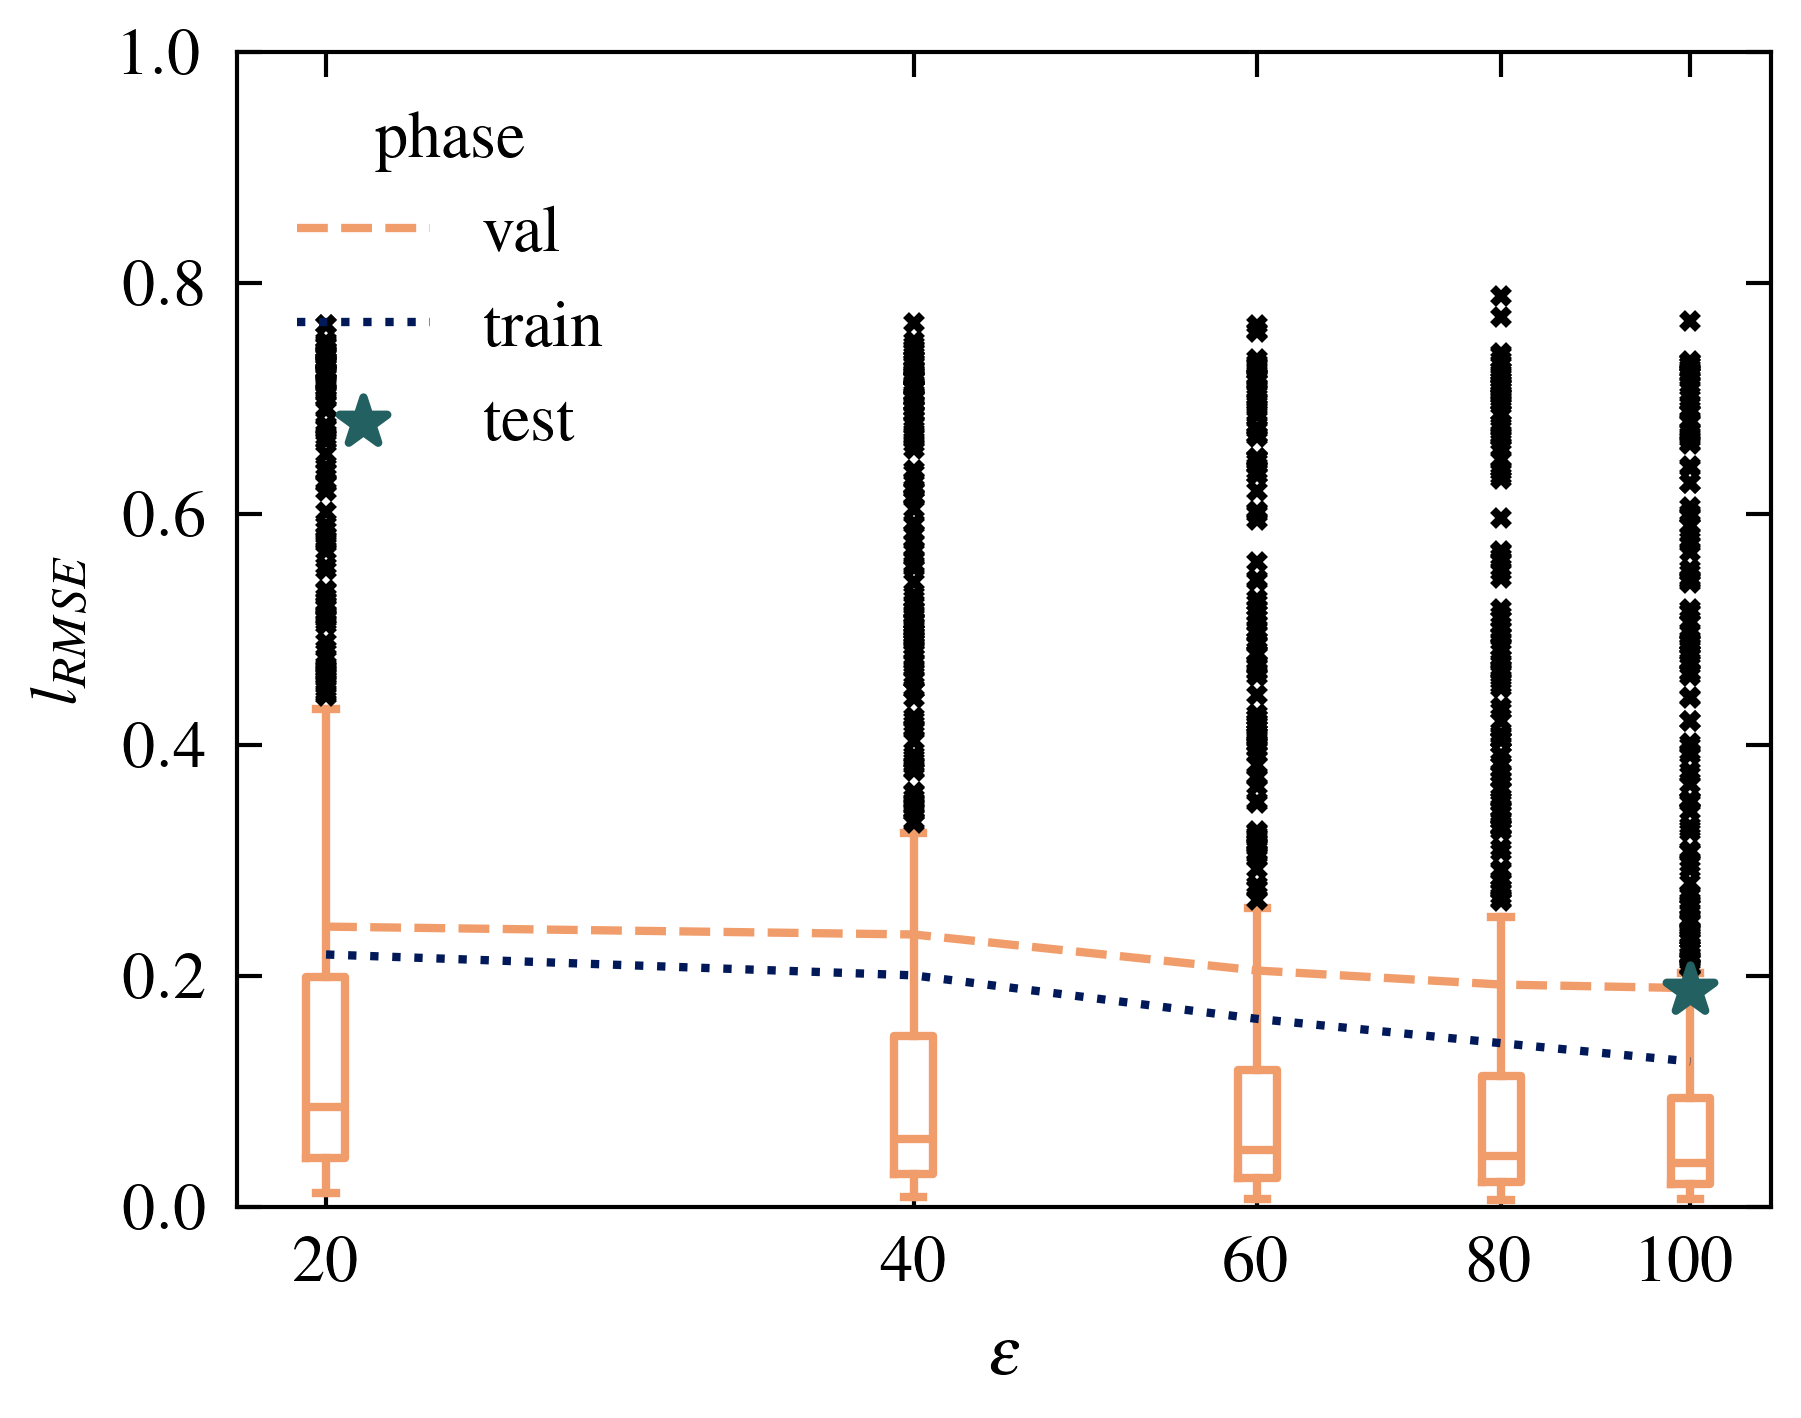

In [50]:
# Restrict to Ia-3d
df_I = df.loc[df["group"] == "I a -3 d"]

epochs = [20, 40, 60, 80, 100]
pparam = dict(xlabel=r'$\varepsilon$', ylabel=r'$l_{RMSE}$', xticks=epochs, xticklabels=epochs)


fig, ax = plt.subplots()

ax.set_xscale('log')
plt.minorticks_off()

colors = iter([cm.batlowS(i) for i in range(10)])

c_train = next(colors)
next(colors)
next(colors)
c_test = next(colors)
c_val = next(colors)
c_box = dict(color=c_val)


average_mse = df_I.groupby(['phase', 'epoch'])['MSE'].mean().reset_index()
for i, phase in enumerate(["val", "train"]):
    df_average_mse_phase = average_mse.loc[average_mse['phase'] == phase]
    
    if phase == "train":
        c = c_train
    else:
        c = c_val
    
    # Line plot
    ax.plot(df_average_mse_phase["epoch"], np.sqrt(df_average_mse_phase["MSE"]), label=phase, linestyle=["--", ":"][i], color=c)
    
    # Box plot
    if phase == "val":
        for epoch in epochs:
            width = 10**(np.log10(epoch)+0.01)-10**(np.log10(epoch)-0.01)
            bp = ax.boxplot(np.sqrt(df_I.loc[(df_I['phase'] == phase) & (df_I['epoch'] == epoch)]["MSE"]), positions=[epoch], showfliers=True, widths=width,
                boxprops=c_box, medianprops=c_box, whiskerprops=c_box, capprops=c_box,
                flierprops={'marker': 'x', 'markersize': 2})

# Scatter point
df_test = average_mse.loc[average_mse['phase'] == "test"]
ax.scatter(100, np.sqrt(df_test.loc[df_test["epoch"] == 100]["MSE"]), label="test", marker="*", zorder=2, color=c_test)

ax.legend(title='phase', loc="upper left")
ax.autoscale(tight=True)
ax.set_xlim([18, 110])
ax.set_ylim([0, 1.0])
ax.set(**pparam)

fig.savefig('figures/RMSE_against_epoch_Ia-3d', dpi=1200)

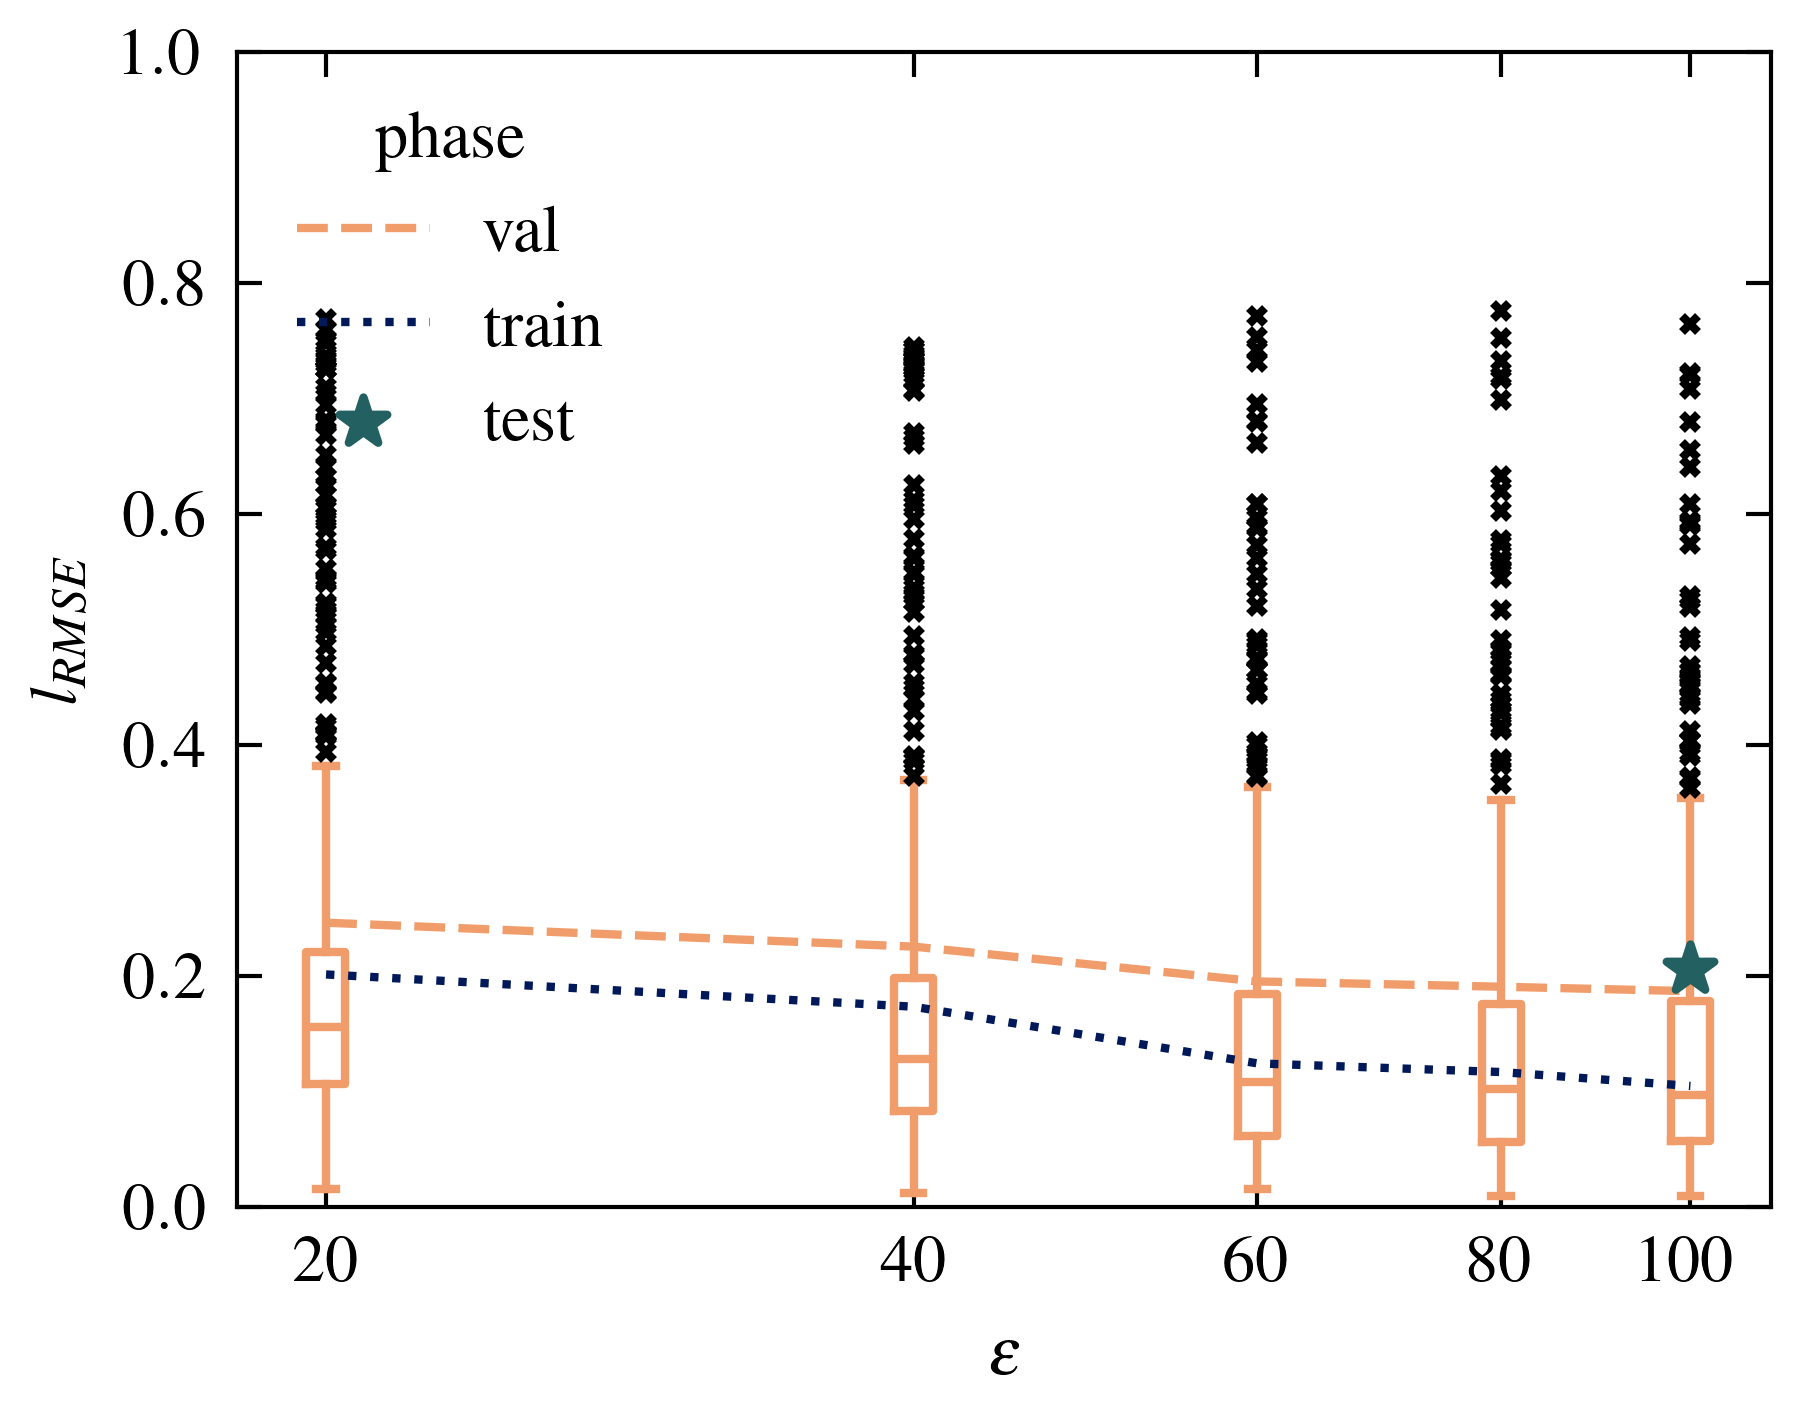

In [61]:
# Restrict to Ia-3d
df_I = df.loc[df["group"] == "I m -3 m"]

epochs = [20, 40, 60, 80, 100]
pparam = dict(xlabel=r'$\varepsilon$', ylabel=r'$l_{RMSE}$', xticks=epochs, xticklabels=epochs)


fig, ax = plt.subplots()

ax.set_xscale('log')
plt.minorticks_off()

colors = iter([cm.batlowS(i) for i in range(10)])

c_train = next(colors)
next(colors)
next(colors)
c_test = next(colors)
c_val = next(colors)
c_box = dict(color=c_val)


average_mse = df_I.groupby(['phase', 'epoch'])['MSE'].mean().reset_index()
for i, phase in enumerate(["val", "train"]):
    df_average_mse_phase = average_mse.loc[average_mse['phase'] == phase]
    
    if phase == "train":
        c = c_train
    else:
        c = c_val
    
    # Line plot
    ax.plot(df_average_mse_phase["epoch"], np.sqrt(df_average_mse_phase["MSE"]), label=phase, linestyle=["--", ":"][i], color=c)
    
    # Box plot
    if phase == "val":
        for epoch in epochs:
            width = 10**(np.log10(epoch)+0.01)-10**(np.log10(epoch)-0.01)
            bp = ax.boxplot(np.sqrt(df_I.loc[(df_I['phase'] == phase) & (df_I['epoch'] == epoch)]["MSE"]), positions=[epoch], showfliers=True, widths=width,
                boxprops=c_box, medianprops=c_box, whiskerprops=c_box, capprops=c_box,
                flierprops={'marker': 'x', 'markersize': 2})

# Scatter point
df_test = average_mse.loc[average_mse['phase'] == "test"]
ax.scatter(100, np.sqrt(df_test.loc[df_test["epoch"] == 100]["MSE"]), label="test", marker="*", zorder=2, color=c_test)

legend = ax.legend(title='phase', loc="upper left", framealpha=0.5)
ax.autoscale(tight=True)
ax.set_xlim([18, 110])
ax.set_ylim([0, 1.0])
ax.set(**pparam)

fig.savefig('figures/RMSE_against_epoch_Im-3m', dpi=1200)

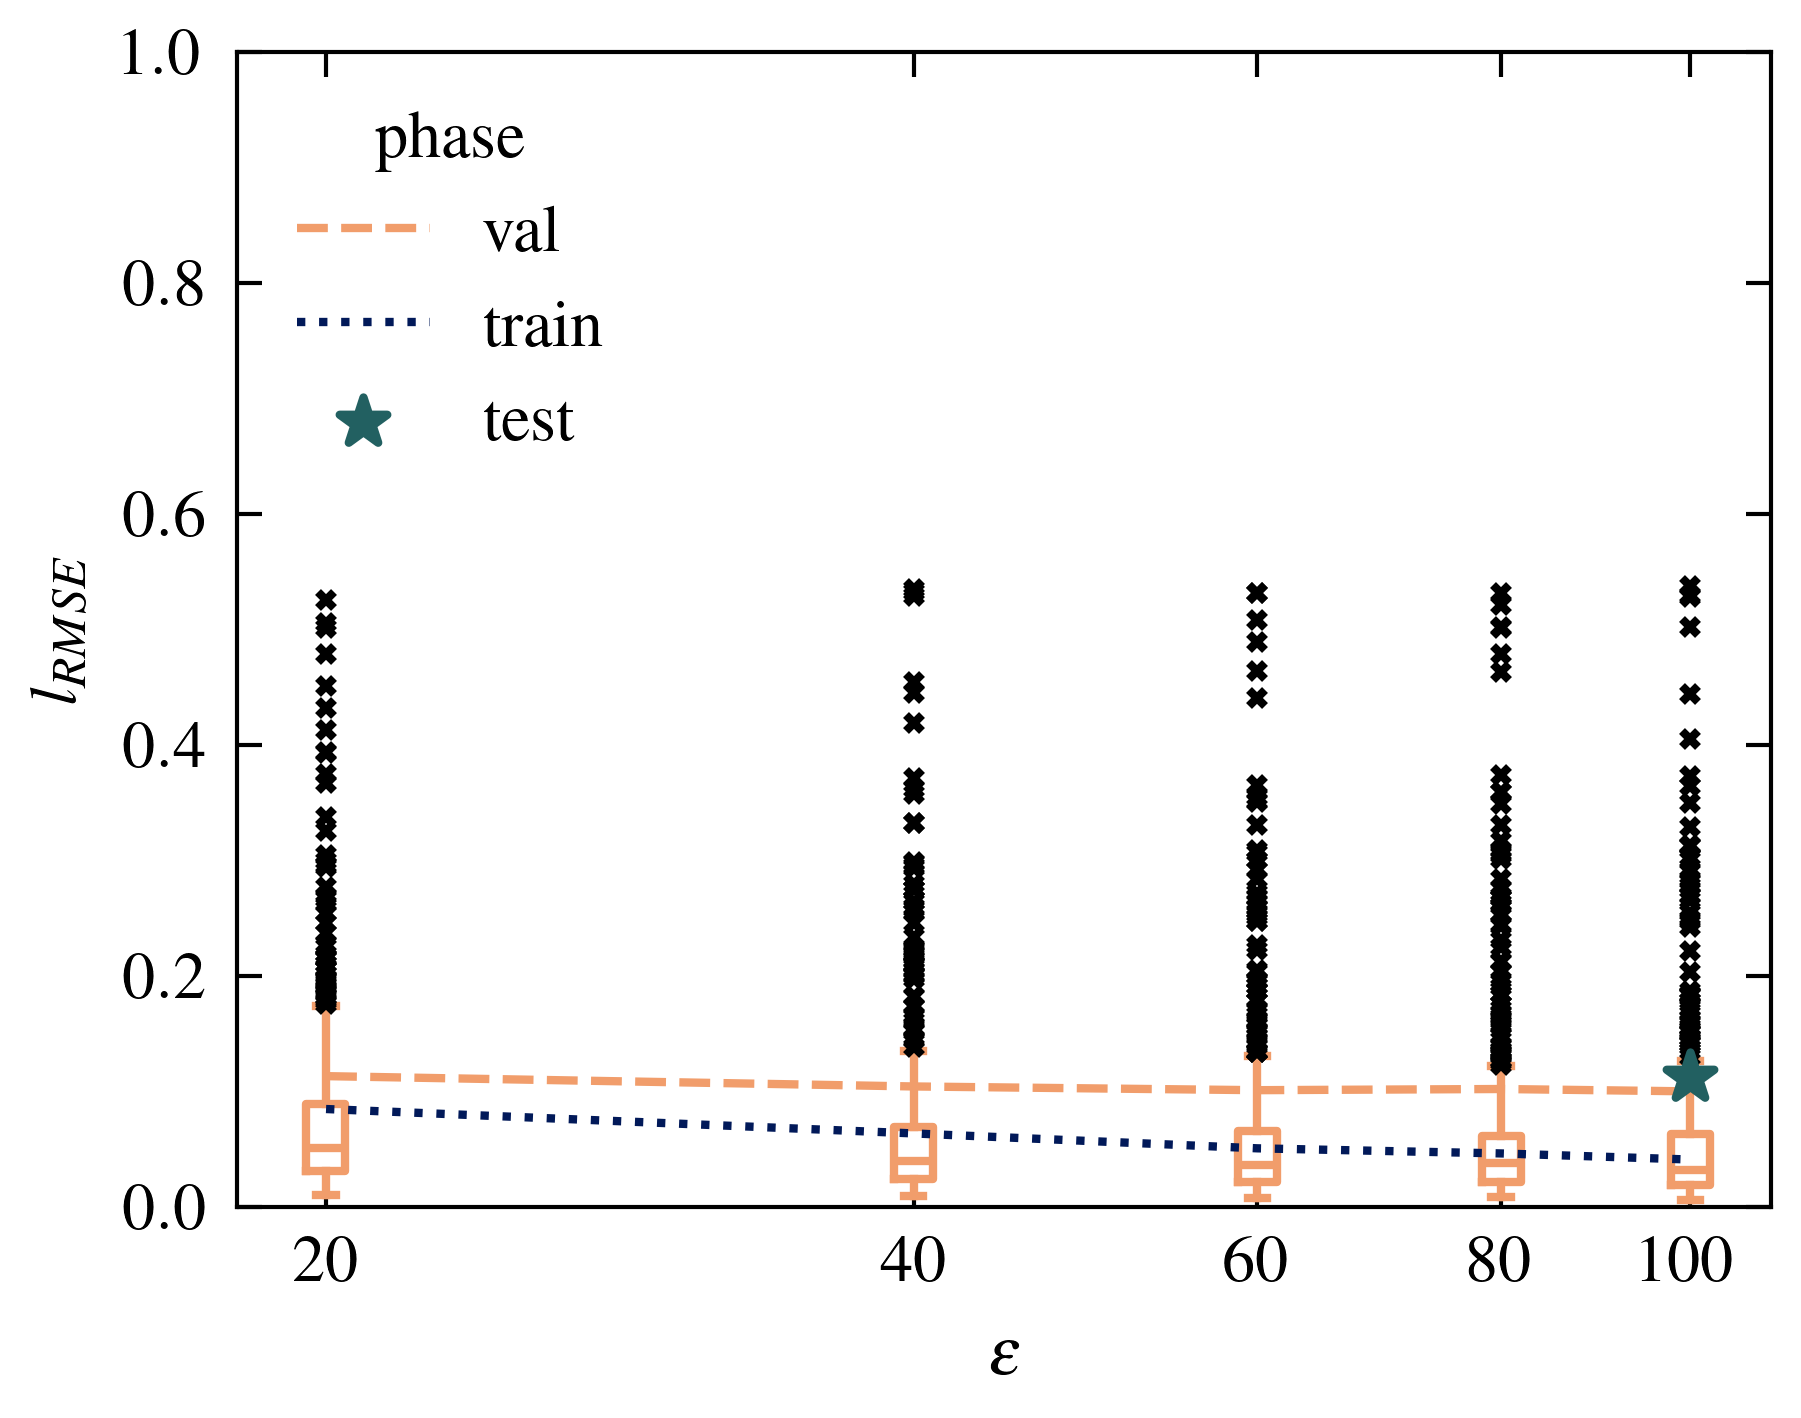

In [52]:
# Restrict to Ia-3d
df_I = df.loc[df["group"] == "P m -3 n"]

epochs = [20, 40, 60, 80, 100]
pparam = dict(xlabel=r'$\varepsilon$', ylabel=r'$l_{RMSE}$', xticks=epochs, xticklabels=epochs)


fig, ax = plt.subplots()

ax.set_xscale('log')
plt.minorticks_off()

colors = iter([cm.batlowS(i) for i in range(10)])

c_train = next(colors)
next(colors)
next(colors)
c_test = next(colors)
c_val = next(colors)
c_box = dict(color=c_val)


average_mse = df_I.groupby(['phase', 'epoch'])['MSE'].mean().reset_index()
for i, phase in enumerate(["val", "train"]):
    df_average_mse_phase = average_mse.loc[average_mse['phase'] == phase]
    
    if phase == "train":
        c = c_train
    else:
        c = c_val
    
    # Line plot
    ax.plot(df_average_mse_phase["epoch"], np.sqrt(df_average_mse_phase["MSE"]), label=phase, linestyle=["--", ":"][i], color=c)
    
    # Box plot
    if phase == "val":
        for epoch in epochs:
            width = 10**(np.log10(epoch)+0.01)-10**(np.log10(epoch)-0.01)
            bp = ax.boxplot(np.sqrt(df_I.loc[(df_I['phase'] == phase) & (df_I['epoch'] == epoch)]["MSE"]), positions=[epoch], showfliers=True, widths=width,
                boxprops=c_box, medianprops=c_box, whiskerprops=c_box, capprops=c_box,
                flierprops={'marker': 'x', 'markersize': 2})

# Scatter point
df_test = average_mse.loc[average_mse['phase'] == "test"]
ax.scatter(100, np.sqrt(df_test.loc[df_test["epoch"] == 100]["MSE"]), label="test", marker="*", zorder=2, color=c_test)

ax.legend(title='phase', loc="upper left")
ax.autoscale(tight=True)
ax.set_xlim([18, 110])
ax.set_ylim([0, 1.0])
ax.set(**pparam)

fig.savefig('figures/RMSE_against_epoch_Pm-3n', dpi=1200)

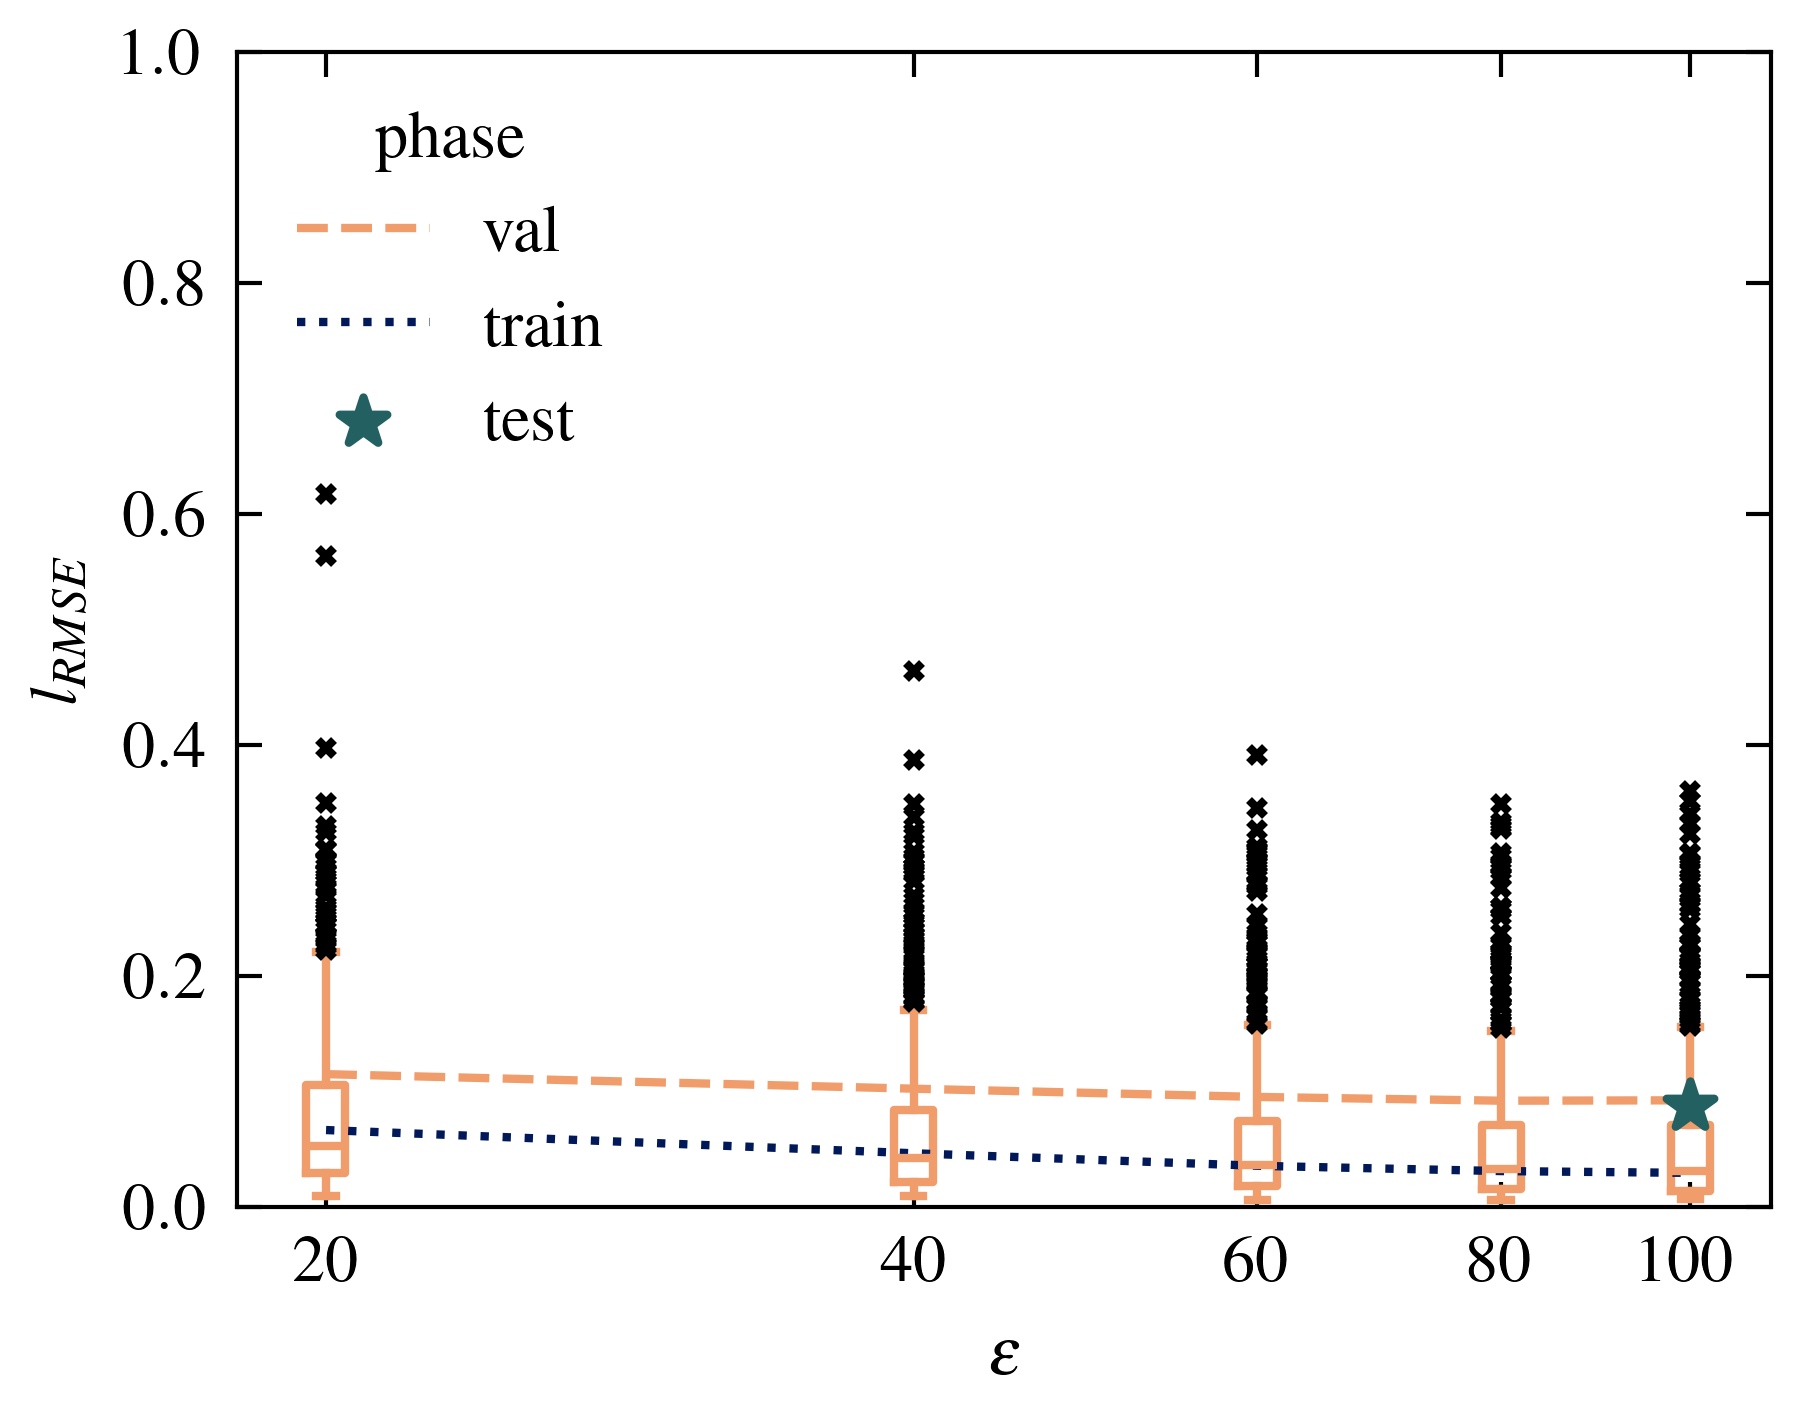

In [53]:
# Restrict to Ia-3d
df_I = df.loc[df["group"] == "I a -3"]

epochs = [20, 40, 60, 80, 100]
pparam = dict(xlabel=r'$\varepsilon$', ylabel=r'$l_{RMSE}$', xticks=epochs, xticklabels=epochs)


fig, ax = plt.subplots()

ax.set_xscale('log')
plt.minorticks_off()

colors = iter([cm.batlowS(i) for i in range(10)])

c_train = next(colors)
next(colors)
next(colors)
c_test = next(colors)
c_val = next(colors)
c_box = dict(color=c_val)


average_mse = df_I.groupby(['phase', 'epoch'])['MSE'].mean().reset_index()
for i, phase in enumerate(["val", "train"]):
    df_average_mse_phase = average_mse.loc[average_mse['phase'] == phase]
    
    if phase == "train":
        c = c_train
    else:
        c = c_val
    
    # Line plot
    ax.plot(df_average_mse_phase["epoch"], np.sqrt(df_average_mse_phase["MSE"]), label=phase, linestyle=["--", ":"][i], color=c)
    
    # Box plot
    if phase == "val":
        for epoch in epochs:
            width = 10**(np.log10(epoch)+0.01)-10**(np.log10(epoch)-0.01)
            bp = ax.boxplot(np.sqrt(df_I.loc[(df_I['phase'] == phase) & (df_I['epoch'] == epoch)]["MSE"]), positions=[epoch], showfliers=True, widths=width,
                boxprops=c_box, medianprops=c_box, whiskerprops=c_box, capprops=c_box,
                flierprops={'marker': 'x', 'markersize': 2})

# Scatter point
df_test = average_mse.loc[average_mse['phase'] == "test"]
ax.scatter(100, np.sqrt(df_test.loc[df_test["epoch"] == 100]["MSE"]), label="test", marker="*", zorder=2, color=c_test)

ax.legend(title='phase', loc="upper left")
ax.autoscale(tight=True)
ax.set_xlim([18, 110])
ax.set_ylim([0, 1.0])
ax.set(**pparam)

fig.savefig('figures/RMSE_against_epoch_Ia-3', dpi=1200)